<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [MNIST1] - Simple classification with DNN
<!-- DESC --> An example of classification using a dense neural network for the famous MNIST dataset
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Recognizing handwritten numbers
 - Understanding the principle of a classifier DNN network 
 - Implementation with Keras 


The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## Step 1 - Init python stuff

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('MNIST1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.12
Notebook id          : MNIST1
Run time             : Tuesday 09 February 2021, 18:32:46
TensorFlow version   : 2.4.0
Keras version        : 2.4.0
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


## Step 2 - Retrieve data
MNIST is one of the most famous historic dataset.  
Include in [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


## Step 3 - Preparing the data

In [3]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255


After normalization  : Min=0.0, max=1.0


### Have a look

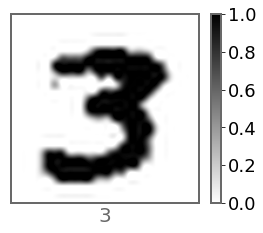

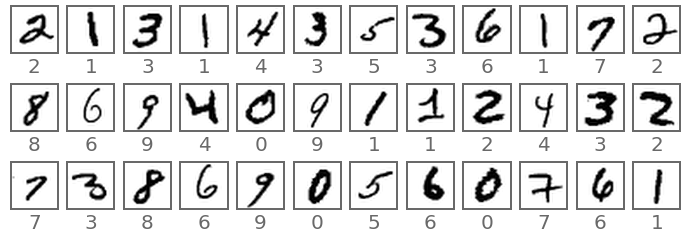

In [4]:
pwk.plot_images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
pwk.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

## Step 4 - Create model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [5]:
hidden1     = 100
hidden2     = 100

model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 5 - Train the model

In [6]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16


  1/118 [..............................] - ETA: 1:31 - loss: 2.3304 - accuracy: 0.0781

 30/118 [======>.......................] - ETA: 0s - loss: 1.7565 - accuracy: 0.4865  

 59/118 [==============>...............] - ETA: 0s - loss: 1.3884 - accuracy: 0.6086

 88/118 [=====================>........] - ETA: 0s - loss: 1.1748 - accuracy: 0.6723

117/118 [============================>.] - ETA: 0s - loss: 1.0354 - accuracy: 0.7125

118/118 [==============================] - 2s 9ms/step - loss: 1.0276 - accuracy: 0.7147 - val_loss: 0.2472 - val_accuracy: 0.9291


Epoch 2/16
  1/118 [..............................] - ETA: 0s - loss: 0.2643 - accuracy: 0.9395

 30/118 [======>.......................] - ETA: 0s - loss: 0.2418 - accuracy: 0.9342

 60/118 [==============>...............] - ETA: 0s - loss: 0.2370 - accuracy: 0.9342

 89/118 [=====================>........] - ETA: 0s - loss: 0.2329 - accuracy: 0.9349

118/118 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.9359 - val_loss: 0.1882 - val_accuracy: 0.9463


Epoch 3/16
  1/118 [..............................] - ETA: 0s - loss: 0.1487 - accuracy: 0.9570

 31/118 [======>.......................] - ETA: 0s - loss: 0.1710 - accuracy: 0.9517

 61/118 [==============>...............] - ETA: 0s - loss: 0.1681 - accuracy: 0.9523

 90/118 [=====================>........] - ETA: 0s - loss: 0.1667 - accuracy: 0.9527

118/118 [==============================] - 0s 3ms/step - loss: 0.1655 - accuracy: 0.9529 - val_loss: 0.1479 - val_accuracy: 0.9546


Epoch 4/16
  1/118 [..............................] - ETA: 0s - loss: 0.1608 - accuracy: 0.9512

 29/118 [======>.......................] - ETA: 0s - loss: 0.1442 - accuracy: 0.9585

 58/118 [=============>................] - ETA: 0s - loss: 0.1398 - accuracy: 0.9600

 87/118 [=====================>........] - ETA: 0s - loss: 0.1374 - accuracy: 0.9606

117/118 [============================>.] - ETA: 0s - loss: 0.1356 - accuracy: 0.9610

118/118 [==============================] - 0s 3ms/step - loss: 0.1355 - accuracy: 0.9610 - val_loss: 0.1324 - val_accuracy: 0.9603


Epoch 5/16


  1/118 [..............................] - ETA: 0s - loss: 0.1037 - accuracy: 0.9668

 30/118 [======>.......................] - ETA: 0s - loss: 0.1074 - accuracy: 0.9687

 59/118 [==============>...............] - ETA: 0s - loss: 0.1082 - accuracy: 0.9687

 89/118 [=====================>........] - ETA: 0s - loss: 0.1085 - accuracy: 0.9686

118/118 [==============================] - 0s 3ms/step - loss: 0.1083 - accuracy: 0.9687 - val_loss: 0.1182 - val_accuracy: 0.9641


Epoch 6/16
  1/118 [..............................] - ETA: 0s - loss: 0.0903 - accuracy: 0.9688

 30/118 [======>.......................] - ETA: 0s - loss: 0.0914 - accuracy: 0.9735

 60/118 [==============>...............] - ETA: 0s - loss: 0.0923 - accuracy: 0.9738

 90/118 [=====================>........] - ETA: 0s - loss: 0.0923 - accuracy: 0.9737

118/118 [==============================] - 0s 3ms/step - loss: 0.0922 - accuracy: 0.9736 - val_loss: 0.0992 - val_accuracy: 0.9692


Epoch 7/16
  1/118 [..............................] - ETA: 0s - loss: 0.0965 - accuracy: 0.9727

 31/118 [======>.......................] - ETA: 0s - loss: 0.0820 - accuracy: 0.9761

 62/118 [==============>...............] - ETA: 0s - loss: 0.0800 - accuracy: 0.9769

 92/118 [======================>.......] - ETA: 0s - loss: 0.0798 - accuracy: 0.9769

118/118 [==============================] - 0s 2ms/step - loss: 0.0795 - accuracy: 0.9770 - val_loss: 0.0969 - val_accuracy: 0.9706


Epoch 8/16
  1/118 [..............................] - ETA: 0s - loss: 0.0615 - accuracy: 0.9824

 31/118 [======>.......................] - ETA: 0s - loss: 0.0652 - accuracy: 0.9812

 61/118 [==============>...............] - ETA: 0s - loss: 0.0659 - accuracy: 0.9811

 92/118 [======================>.......] - ETA: 0s - loss: 0.0664 - accuracy: 0.9808

118/118 [==============================] - 0s 2ms/step - loss: 0.0670 - accuracy: 0.9806 - val_loss: 0.0931 - val_accuracy: 0.9708


Epoch 9/16
  1/118 [..............................] - ETA: 0s - loss: 0.0885 - accuracy: 0.9727

 31/118 [======>.......................] - ETA: 0s - loss: 0.0600 - accuracy: 0.9832

 61/118 [==============>...............] - ETA: 0s - loss: 0.0599 - accuracy: 0.9831

 90/118 [=====================>........] - ETA: 0s - loss: 0.0598 - accuracy: 0.9831

118/118 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9830 - val_loss: 0.0871 - val_accuracy: 0.9725


Epoch 10/16
  1/118 [..............................] - ETA: 0s - loss: 0.0563 - accuracy: 0.9824

 31/118 [======>.......................] - ETA: 0s - loss: 0.0557 - accuracy: 0.9837

 61/118 [==============>...............] - ETA: 0s - loss: 0.0558 - accuracy: 0.9838

 92/118 [======================>.......] - ETA: 0s - loss: 0.0554 - accuracy: 0.9840

118/118 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9840 - val_loss: 0.0821 - val_accuracy: 0.9750


Epoch 11/16
  1/118 [..............................] - ETA: 0s - loss: 0.0572 - accuracy: 0.9824

 30/118 [======>.......................] - ETA: 0s - loss: 0.0491 - accuracy: 0.9856

 59/118 [==============>...............] - ETA: 0s - loss: 0.0499 - accuracy: 0.9853

 89/118 [=====================>........] - ETA: 0s - loss: 0.0499 - accuracy: 0.9853

118/118 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9854 - val_loss: 0.0842 - val_accuracy: 0.9736


Epoch 12/16
  1/118 [..............................] - ETA: 0s - loss: 0.0336 - accuracy: 0.9941

 30/118 [======>.......................] - ETA: 0s - loss: 0.0409 - accuracy: 0.9894

 59/118 [==============>...............] - ETA: 0s - loss: 0.0408 - accuracy: 0.9890

 88/118 [=====================>........] - ETA: 0s - loss: 0.0414 - accuracy: 0.9887

117/118 [============================>.] - ETA: 0s - loss: 0.0419 - accuracy: 0.9884

118/118 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9884 - val_loss: 0.0814 - val_accuracy: 0.9757


Epoch 13/16
  1/118 [..............................] - ETA: 0s - loss: 0.0467 - accuracy: 0.9902

 31/118 [======>.......................] - ETA: 0s - loss: 0.0382 - accuracy: 0.9900

 60/118 [==============>...............] - ETA: 0s - loss: 0.0376 - accuracy: 0.9901

 88/118 [=====================>........] - ETA: 0s - loss: 0.0374 - accuracy: 0.9902

118/118 [==============================] - ETA: 0s - loss: 0.0374 - accuracy: 0.9902

118/118 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9902 - val_loss: 0.0833 - val_accuracy: 0.9736


Epoch 14/16
  1/118 [..............................] - ETA: 0s - loss: 0.0491 - accuracy: 0.9766

 31/118 [======>.......................] - ETA: 0s - loss: 0.0333 - accuracy: 0.9898

 62/118 [==============>...............] - ETA: 0s - loss: 0.0329 - accuracy: 0.9905

 92/118 [======================>.......] - ETA: 0s - loss: 0.0329 - accuracy: 0.9907

118/118 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9907 - val_loss: 0.0756 - val_accuracy: 0.9771


Epoch 15/16
  1/118 [..............................] - ETA: 0s - loss: 0.0438 - accuracy: 0.9883

 30/118 [======>.......................] - ETA: 0s - loss: 0.0345 - accuracy: 0.9914

 59/118 [==============>...............] - ETA: 0s - loss: 0.0324 - accuracy: 0.9918

 88/118 [=====================>........] - ETA: 0s - loss: 0.0317 - accuracy: 0.9919

117/118 [============================>.] - ETA: 0s - loss: 0.0312 - accuracy: 0.9920

118/118 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9920 - val_loss: 0.0871 - val_accuracy: 0.9739


Epoch 16/16
  1/118 [..............................] - ETA: 0s - loss: 0.0274 - accuracy: 0.9941

 31/118 [======>.......................] - ETA: 0s - loss: 0.0253 - accuracy: 0.9937

 61/118 [==============>...............] - ETA: 0s - loss: 0.0254 - accuracy: 0.9936

 91/118 [======================>.......] - ETA: 0s - loss: 0.0252 - accuracy: 0.9935

118/118 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 0.9935 - val_loss: 0.0769 - val_accuracy: 0.9771


## Step 6 - Evaluate
### 6.1 - Final loss and accuracy

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.07693127542734146
Test accuracy : 0.9771000146865845


### 6.2 - Plot history

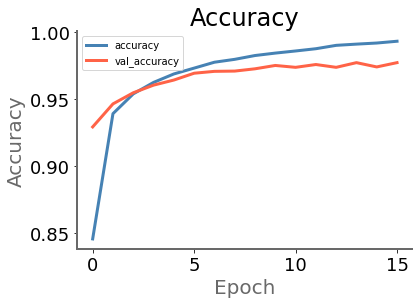

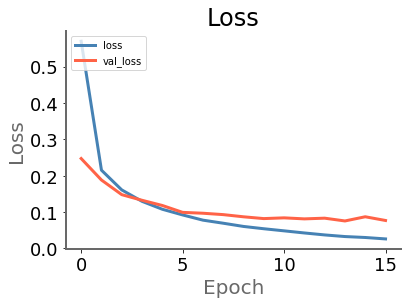

In [8]:
pwk.plot_history(history, figsize=(6,4), save_as='03-history')

### 6.3 - Plot results

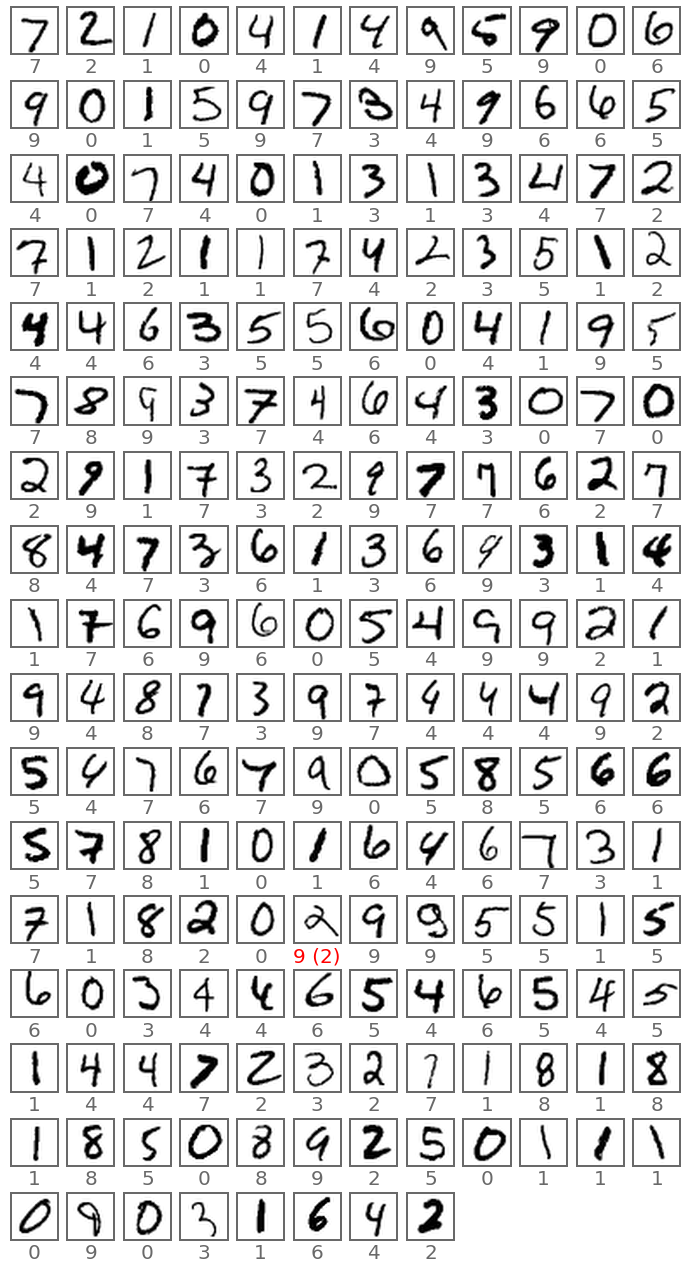

In [9]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

pwk.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 6.4 - Plot some errors

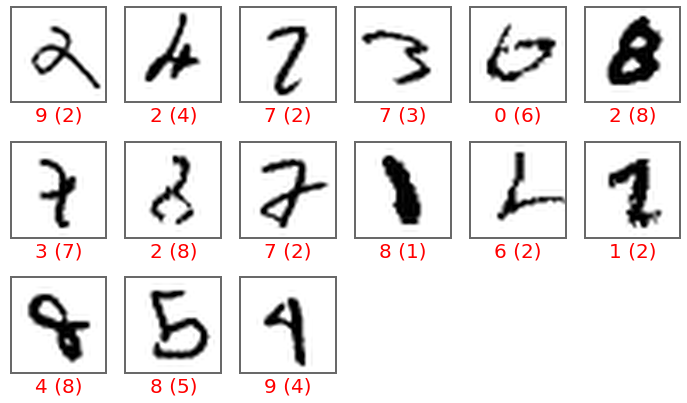

In [10]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
pwk.plot_images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

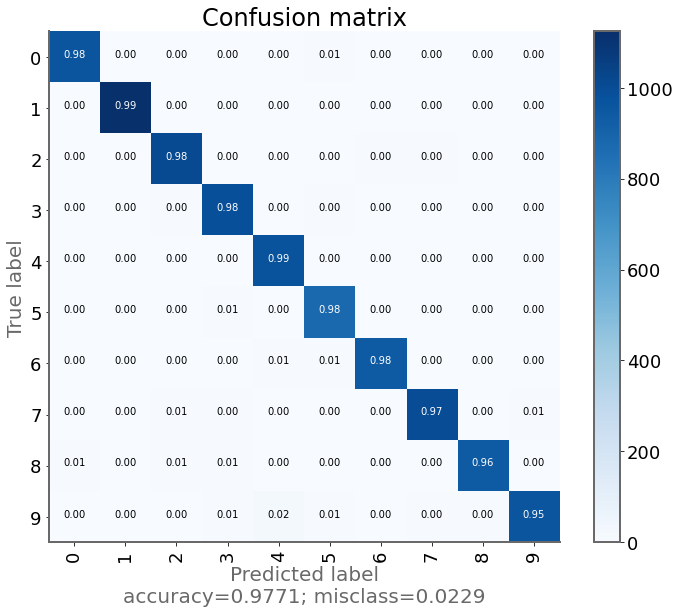

In [11]:
pwk.plot_confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

In [12]:
pwk.end()

End time is : Tuesday 09 February 2021, 18:33:29
Duration is : 00:00:43 809ms
This notebook ends here


<div class="todo">
    A few things you can do for fun:
    <ul>
        <li>Changing the network architecture (layers, number of neurons, etc.)</li>
        <li>Display a summary of the network</li>
        <li>Retrieve and display the softmax output of the network, to evaluate its "doubts".</li>
    </ul>
</div>

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>